# DSW 08/03/2018 : Pokemon Data Set 

Cool database of all pokemon cards and their attributes !

**Importing Modules**

In [127]:
%matplotlib inline
import pandas as pd    # Used for data analysis
import matplotlib.pyplot as plt    # Used for assisting visualizations
import seaborn as sns    # Main visualization library

sns.set(style = 'darkgrid', color_codes = True) # My personal style preferences

# This is used as a hack in Jupyter Notebook to make seabron plots bigger. Call before making a plot.
def setplt():
    f, ax = plt.subplots(figsize=(15, 9))
    sns.despine(f, left=True, bottom=True)

**Reading in the CSV** (Make sure you have a link to csv or the csv is in your directory)

In [128]:
poke_data = pd.read_csv('Pokemon.csv') # This should work since Pokemon.csv is in the same directory as this file
poke_data.head() # Print out the first few lines of data to make sure it's working

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

#### Ask yourself some questions about the data

What are the different types of pokemon?

In [129]:
poke_data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

What is the disbtribution of each type of pokemon? Lets **see** this.

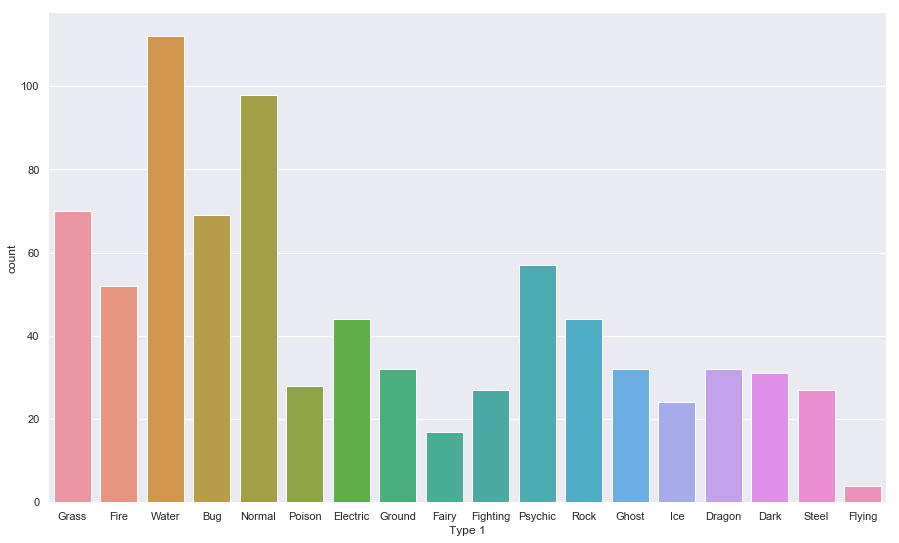

In [130]:
# Here we use a countplot in seaborn.
setplt() # Call this function before plotting in seaborn
countplt = sns.countplot(x = 'Type 1', data = poke_data)

Lets see some statistics in a more whole sense.

In [131]:
poke_data.describe().round()

#  Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
count  800.0  800.0  800.0   800.0    800.0    800.0    800.0  800.0   
mean   363.0  435.0   69.0    79.0     74.0     73.0     72.0   68.0   
std    208.0  120.0   26.0    32.0     31.0     33.0     28.0   29.0   
min      1.0  180.0    1.0     5.0      5.0     10.0     20.0    5.0   
25%    185.0  330.0   50.0    55.0     50.0     50.0     50.0   45.0   
50%    364.0  450.0   65.0    75.0     70.0     65.0     70.0   65.0   
75%    539.0  515.0   80.0   100.0     90.0     95.0     90.0   90.0   
max    721.0  780.0  255.0   190.0    230.0    194.0    230.0  180.0   

       Generation  
count       800.0  
mean          3.0  
std           2.0  
min           1.0  
25%           2.0  
50%           3.0  
75%           5.0  
max           6.0

Lets visualize this.

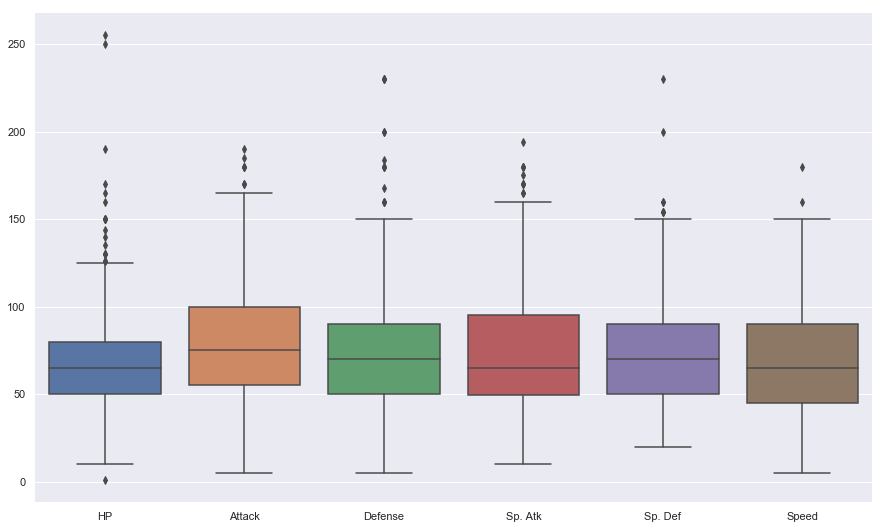

In [132]:
setplt()
useful_data = poke_data.drop(["Generation", "Legendary","Total", "#"],1) # These are kinda useless aren't they?
sns.boxplot(data = useful_data)

Does a Pokemon's Attack have any relationship to its Defense? Does the type of pokemon matter at all? 

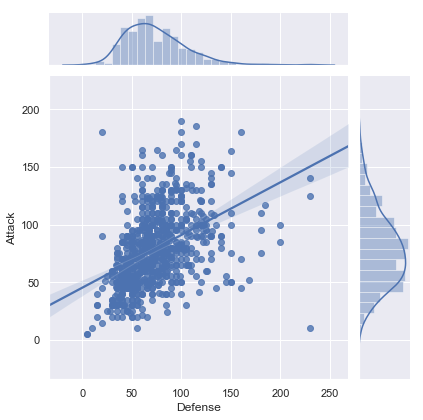

In [133]:
jntplt = sns.jointplot(x = 'Defense', y = 'Attack', data = poke_data, kind = "reg")

Is there a relationship between HP and Attack abilities. Does it matter if they are legendary?

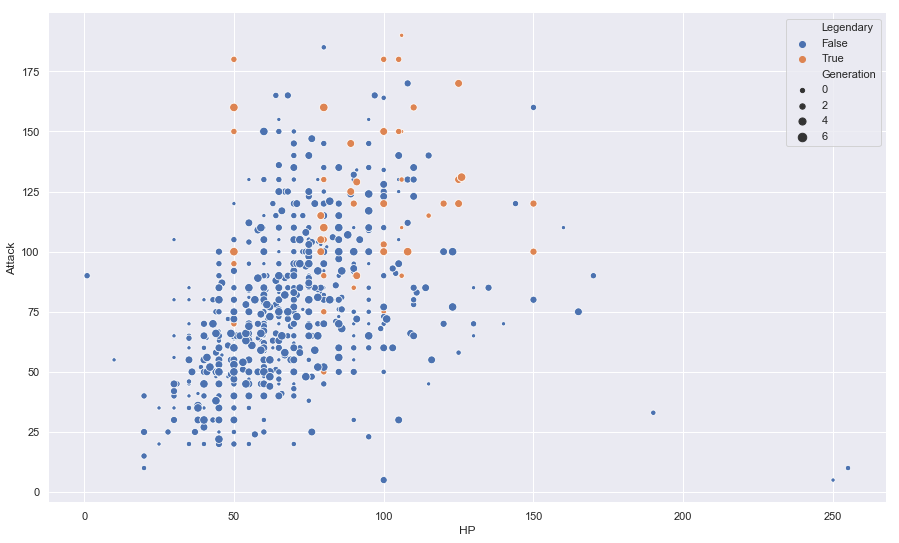

In [134]:
setplt()
scatplt = sns.scatterplot(x = 'HP', y = 'Attack',hue = "Legendary", data = poke_data, size = "Generation" )

Lets look at the distribution of HP

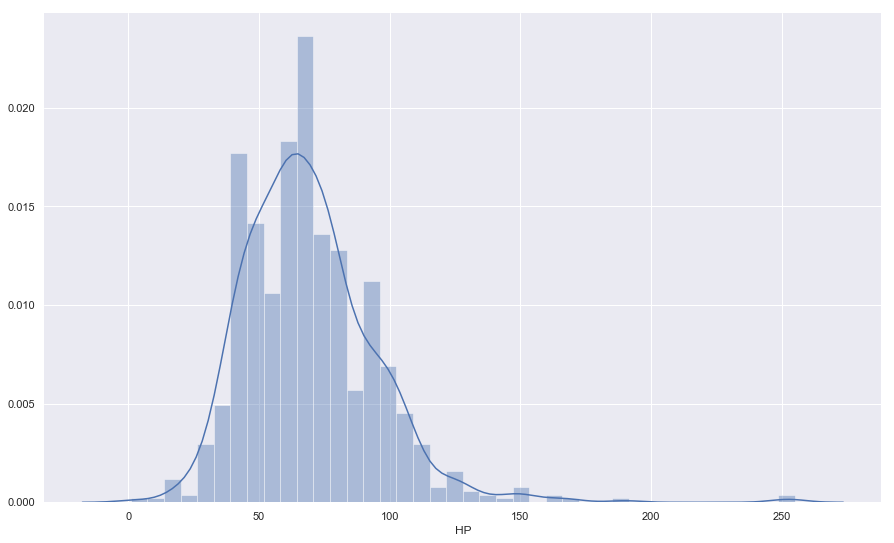

In [135]:
setplt()
distplt = sns.distplot(poke_data['HP'])

Lets make a subset of the data for only Legendary pokemon

In [136]:
legendary = poke_data[poke_data['Legendary'] == True]
legendary.head()

#                 Name    Type 1    Type 2  Total   HP  Attack  \
156  144             Articuno       Ice    Flying    580   90      85   
157  145               Zapdos  Electric    Flying    580   90      90   
158  146              Moltres      Fire    Flying    580   90     100   
162  150               Mewtwo   Psychic       NaN    680  106     110   
163  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
156      100       95      125     85           1       True  
157       85      125       90    100           1       True  
158       90      125       85     90           1       True  
162       90      154       90    130           1       True  
163      100      154      100    130           1       True

Any difference in Attack and Defense overall?

In [137]:
print("Attack:")
print(legendary['Attack'].mean())
print(poke_data['Attack'].mean())
print("\nDefense:")
print(legendary['Defense'].mean())
print(poke_data['Defense'].mean())

Attack:
116.67692307692307
79.00125

Defense:
99.66153846153846
73.8425


Now to the question that everyone is asking...   
### Groudon vs. Kyogre

In [179]:
Groudon = useful_data[useful_data["Name"] == "Groudon"]
Kyogre = useful_data[useful_data["Name"] == "Kyogre"]

Lets see the info for Groudon and Kyogre

In [180]:
print(Groudon) 
print("\n")
print(Kyogre)

        Name  Type 1 Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
423  Groudon  Ground    NaN  100     150      140      100       90     90


       Name Type 1 Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
421  Kyogre  Water    NaN  100     100       90      150      140     90


In [181]:
import numpy as np
labels = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])  # We just need to look at these

groudon = useful_data.loc[423,labels].values      # Collecting the data for groudon using numpy for format it
groudon = np.concatenate((groudon, [groudon[0]]))

kyogre = useful_data.loc[421,labels].values
kyogre = np.concatenate((kyogre, [kyogre[0]]))    # Collecting the data for kyogre using numpy for format it

angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)  # Creating set points for angles given labels
angles = np.concatenate((angles, [angles[0]]))


Lets make a Radar Plot

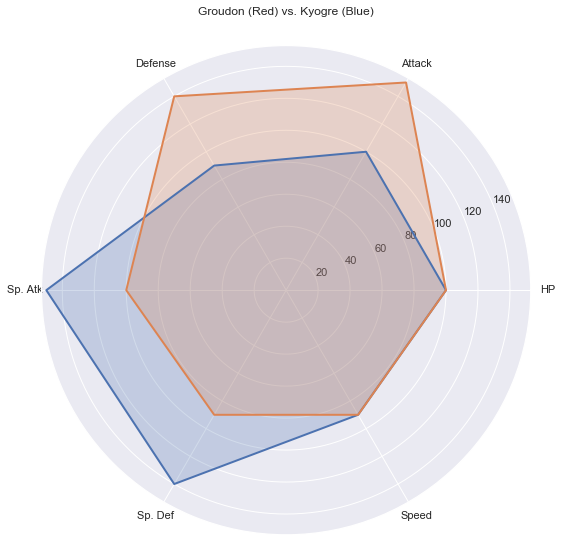

In [182]:
# Creating figure
fig = plt.figure(figsize = (9,9))
rplt = fig.add_subplot(111, polar = True)

# Adding kyogre
rplt.plot(angles, kyogre, linewidth = 2)
rplt.fill(angles, kyogre, alpha = 0.25)

# Adding Groudon
rplt.plot(angles, groudon, linewidth = 2)
rplt.fill(angles, groudon, alpha = 0.25)

# Adding labels and aesthitics
rplt.set_thetagrids(angles*180/np.pi, labels)
rplt.set_title("Groudon (Red) vs. Kyogre (Blue)")
rplt.grid(True)

**WOW**

There doesn't seem to be a clear winner. I guess we will never know  :(